In [1]:
from copy import deepcopy
from AI_Agent import AI
from Game import Kalaha
import matplotlib.pyplot as plt
import copy
import random
import numpy as np
import time

In [ ]:
#Without pruning
depth = []
timings = []
for i in range(0, 9, 1):
    game = Kalaha()
    player=game.player1
    agent = AI(i,True,False,False)
    game_copy = deepcopy(game)
            
            
    start = time.time()
    
    best_move = agent.get_best_move(game_copy, game.get_state(), maximizing_player=False,pruning=False)

    end = time.time()
    
    depth.append(i)
    timings.append(round(end - start, 2))

In [ ]:
#with pruning
depth_ab = []
timings_ab = []
for i in range(0, 11, 1):
    game = Kalaha()
    player=game.player1
    agent = AI(i,True,False,False)
    game_copy = deepcopy(game)
            
            
    start = time.time()
    
    best_move = agent.get_best_move(game_copy, game.get_state(), maximizing_player=False,pruning=True)

    end = time.time()
    depth_ab.append(i)
    timings_ab.append(round(end - start, 2))

In [ ]:
plt.plot(depth, timings, label = "MinMax w/o pruning")
plt.plot(depth_ab, timings_ab, label = "MinMax w. pruning")

plt.xlabel('Search Depth')
plt.ylabel('Time [s]')
plt.legend(loc="upper left")
plt.show()
for i, timing in enumerate(timings): 
    print("Depth: {}  Time MinMax: {} s  Time MinMax AB Pruning {} s".format(i, timing, timings_ab[i]))

In [2]:
def gameplay(eval_store,eval_side,eval_empty, human = False, delay = 0):
    game_development = []
    
    game = Kalaha()
    player = game.player2
    ai_1 = AI(4,eval_store,eval_side,eval_empty)
    ai_2 = AI(4,eval_store,eval_side,eval_empty)
    
    
    while not game.terminal_test(game.get_state()):
        
        if player == game.player1:
            #input of AI is depth of minimax

            game_copy = deepcopy(game)
            best_move = ai_1.get_best_move(game_copy, game.get_state(), maximizing_player=False,pruning=True)

            
            new_state, same_player = game.take(player, best_move, game.get_state())
            game.set_state(new_state)
            if not same_player:
                player = game.player2

            
        else:
            # input of AI is depth of minimax

            game_copy=deepcopy(game)
            best_move=ai_2.get_best_move(game_copy,game.get_state(),maximizing_player=True,pruning=True)


            new_state,same_player = game.take(player, best_move,game.get_state())
            game.set_state(new_state)
            if not same_player:

                player = game.player1
                
        game_development.append(ai_1.evaluate(game.get_state()))
    #When one player runs out of stones
    game.finalize_game(game_over=True)
    return game_development

In [33]:
game_series = []
arguments = ["H1", "H1 + H2", "H1 + H3", "H1 + H2 + H3"]
game_series.append(gameplay(True,False,False))
game_series.append(gameplay(True,True,False))
game_series.append(gameplay(True,False,True))
game_series.append(gameplay(True,True,True))

In [29]:
eval_states=[True,False]
game_series = []
arguments = []
#first eval1 is always true
for state2 in eval_states:
    for state3 in eval_states:
        game_series.append(gameplay(True,state2,state3))
        arguments.append([True,state2,state3])

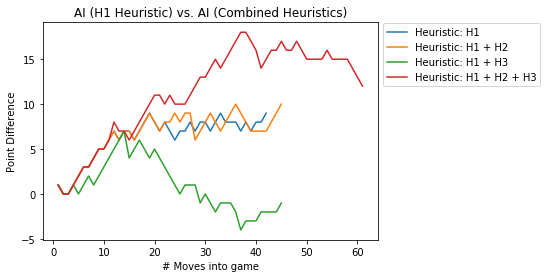

In [35]:
figure = plt.figure()
for i,series in enumerate(game_series):
    plt.plot(range(1,len(series) + 1, 1), series, label="Heuristic: {0}".format(arguments[i]))
plt.title("AI (H1 Heuristic) vs. AI (Combined Heuristics)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.xlabel('# Moves into game')
plt.ylabel('Point Difference')
plt.show()
figure.savefig("Heuristic.pdf", bbox_inches='tight')